<a href="https://colab.research.google.com/github/vshantam/Blindness_Detection/blob/master/Blindness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install kaggle torchvision torch pandas matplotlib numpy scipy scikit-learn

In [0]:
!mkdir ~/.kaggle

In [0]:
!ls -a /content/.kaggle

In [0]:
import json
token = {"username":"vshantam","key":"eb95b0b5d2917ce87b64a974b036c9bd"}
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)
file.close()

In [0]:
!ls -a

In [0]:
!cp /content/kaggle.json  ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                      2MB  2019-08-12 16:24:45           2443  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           2106  
AnalyzeBoston/crimes-in-boston                            Crimes in Boston                                   10MB  2018-09-04 17:56:03          13908  
jolasa/waves-measuring-buoys-data-mooloolaba              Waves Measuring Buoys Data                        599KB  2019-07-07 16:59:44           1549  
citizen-ds-ghana/health-facilities-gh                     Ghana Health Facilities       

In [17]:
!kaggle competitions download -c aptos2019-blindness-detection -p /content

100% 8.00G/8.01G [04:06<00:00, 97.9MB/s]
100% 8.01G/8.01G [04:06<00:00, 34.8MB/s]
 99% 1.49G/1.50G [00:51<00:00, 40.3MB/s]
100% 1.50G/1.50G [00:51<00:00, 31.2MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 50.6MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 24.7MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 57.0MB/s]


In [0]:
!df -h 

Filesystem      Size  Used Avail Use% Mounted on
overlay          49G   26G   22G  55% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1        55G   33G   23G  59% /etc/hosts
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!mkdir Train_Images Test_Images

In [0]:
!unzip train_images.zip  -d Train_Images

In [0]:
!unzip test_images.zip  -d Test_Images/

In [0]:
!cd Train_Images && mkdir 0 1 2 3 4

In [22]:
import pandas as pd
df = pd.read_csv("/content/train.csv",engine="python")
print(df.head())

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [0]:
import os
for var in df.values:
  os.system("mv /content/Train_Images/"+str(var[0])+".png"+" /content/Train_Images/"+str(var[1])+"/"+str(var[0])+".png")


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import helper

In [0]:

data_dir = '/content/Train_Images/'

transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

dataset =datasets.ImageFolder(data_dir,transform=transforms)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

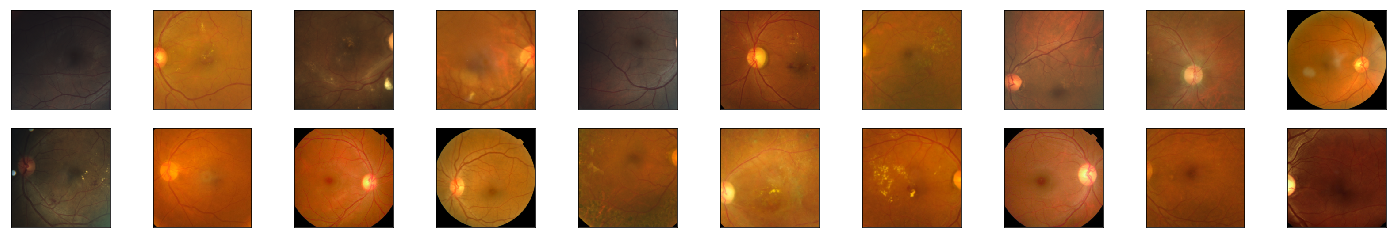

In [45]:
dataiter = iter(dataloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    #ax.set_title(labels[idx])

In [50]:
from torchvision import datasets, models, transforms

# Load the pretrained model from pytorch
vgg19 = models.vgg19(pretrained=True)

# print out the model structure
print(vgg19)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:26<00:00, 22093063.52it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [0]:
import torch.nn as nn

n_inputs = vgg19.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs,5)

vgg19.classifier[6] = last_layer

In [0]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.SGD(vgg19.classifier.parameters(), lr=0.001)

In [57]:
n_epochs = 2

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # model by default is set to train
    for batch_i, (data, target) in enumerate(dataloader):
        # move tensors to GPU if CUDA is available
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = vgg19(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        
        if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0

Epoch 1, Batch 20 loss: 1.1165275812149047
Epoch 1, Batch 40 loss: 1.0162105053663253
Epoch 1, Batch 60 loss: 0.9683575391769409
Epoch 1, Batch 80 loss: 0.9280592322349548
Epoch 1, Batch 100 loss: 0.9357903480529786
Epoch 2, Batch 20 loss: 0.9082912921905517
Epoch 2, Batch 40 loss: 0.8732306510210037
Epoch 2, Batch 60 loss: 0.8388795748353004
Epoch 2, Batch 80 loss: 0.7799659699201584
Epoch 2, Batch 100 loss: 0.9271284043788910
